# Проект: Обнаружение каверов музыкальных треков


Обнаружение треков каверов - важная продуктовая задача, которая может значительно улучшить качество рекомендаций музыкального сервиса и повысить счастье наших пользователей. Если мы умеем с высокой точностью классифицировать каверы и связывать их между собой, то можно предложить пользователю новые возможности для управления потоком треков. Например:

- по желанию пользователя можем полностью исключить каверы из рекомендаций;
- показать все каверы на любимый трек пользователя;
- контролировать долю каверов в ленте пользователя.

В этом хакатоне вам предлагается разработать решение, которое:

- может классифицировать треки по признаку кавер-некавер;
- связывать (группировать) каверы и исходный трек;
- находит исходный трек в цепочке каверов.

Совсем не обязательно, чтобы ваше решение умело делать все три функции. Будет уже здорово, если вы сможете придумать решение хотя бы для одной задачи.

Для решения этой задачи вы можете использовать любые открытые источники данных и собирать необходимую вам информацию, соблюдая правила использования сервисов, которые эту информацию предоставляют.

## Описание данных

Мы предоставляем вам данные, на которых вы можете тестировать ваши решения.

Ссылка https://disk.yandex.ru/d/w2ViWajlqRz9Hw , пароль Music2110

### Разметка каверов

Файл covers.json содержит разметку каверов, сделанную редакторами сервиса:

- track_id - уникальный идентификатор трека;
- track_remake_type - метка, присвоенная редакторами. Может принимать значения ORIGINAL и COVER;
- original_track_id - уникальный идентификатор исходного трека.

<aside>
💡 Обратите внимание, что не для всех каверов известны идентификаторы исходных треков!!!

</aside>

### Метаинформация

- track_id - уникальный идентификатор трека;
- dttm - первая дата появления информации о треке;
- title - название трека;
- language - язык исполнения;
- isrc - международный уникальный идентификатор трека;
- genres - жанры;
- duration - длительность трека;

### Текст песен

- track_id - уникальный идентификатор трека;
- lyricId - уникальный идентификатор текста;
- text - текст трека.

Наш проект нацелен на разработку системы, способной выявлять кавер-версии музыкальных треков. Эта задача имеет важное значение для усовершенствования рекомендательных систем в музыкальном сервисе и, следовательно, для увеличения удовлетворенности наших пользователей. Правильное определение кавер-версий и их связывание с оригинальными треками предоставляет новые возможности для управления музыкальным контентом, такие как:
Пользователи могут исключать кавер-версии из персональных рекомендаций, если они этого желают.
Возможность предоставить полный список кавер-версий для любимых треков пользователей.
Пользователи смогут контролировать количество кавер-версий в своем потоке музыкальных рекомендаций.

Мы привели решение задачи, однако для полной его реализации требуется собрать максимальное число текстов песен так, чтобы в данных были связки COVER-ORIGINAL, что поможет получать более точные результаты.

Был произведен анализ исходных данных. По результатам чего мы определили, что некоторые столбцы могут быть использованы в целях машинного обучения. Кроме того, было решено что нужно дополнить данные информацией об исполнителе и дате релиза трека. С наше й точки зрения ключевой информацией является тексты песен, которые в значительной степени пропущены в исходных данных. Для создания более эффективной модели рекомендуем собрать больше данных с использованием API. Тексты песен были лемматизированы и векторизованы. Были обучены модели для численных признаков RandomForestClassifier(),DecisionTreeClassifier(), LogisticRegression() и CatBoostClassifier () и для лемматизированных текстов песни на моделях RandomForestClassifier(),DecisionTreeClassifier() качество которых проверяли использованием метрик F1-score.

# Концепция исследования


Мы предлагаем это решение как пример. Для обучения более эффективной модели требуется последующий сбор данных с помощью API, на что трабуется затратить время. Мы предлагаем пользоваться musixmatch API.

Именно поэтому мы предлагаем заказчику "технологию" на полностью обработанных данных, чтобы продемонстрировать возможности нашего решения в наиболее полном виде.
Время работы закодированных ячеек слишком велико и во избежание трат лишних ресурсов обоих сторон было принято решение выводить рельтат работы данных ячеек в виде нового датасета с добавленным признаком (результатом работы ячейки)

При желании заказчик может раскодировать данные ячейки и запустить их

## Загрузка необходимых для работы библиотек

In [ ]:
# Загрузка библиотеки

!pip install package_name
!pip install -Uq spacy
!pip install langdetect
!pip install --upgrade pip

In [ ]:
!pip install numpy==1.23.5

In [ ]:
# Установка библиотек
import json
import pandas as pd
import numpy as np
import nltk
import re
import spacy
from datetime import datetime
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm

from langdetect.lang_detect_exception import LangDetectException
from langdetect import detect
from scipy.stats import chi2_contingency
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords

In [ ]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import  TfidfVectorizer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
!pip install transformers torch pandas

In [ ]:
SEED = 12345

## Загрузка данных

In [ ]:
# Функция для распаковки файла json

def load_data_from_json(json_file_path):
    data = []
    with open(json_file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return pd.DataFrame(data)

Применим функцию load_data_from_json чтобы выгрузить предоставленные заказчиком файлы.

In [ ]:
# Загрузим данные с помощью функции load_data_from_json

cover_data = load_data_from_json('/Users/anastasiaklubkova/Downloads/covers.json')
lyrics_data = load_data_from_json('/Users/anastasiaklubkova/Downloads/lyrics.json')
meta_data = load_data_from_json('/Users/anastasiaklubkova/Downloads/meta.json')

# Знакомство с данными

**cover_data**

In [ ]:
cover_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71597 entries, 0 to 71596
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   original_track_id  4821 non-null   object
 1   track_id           71597 non-null  object
 2   track_remake_type  71597 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [ ]:
cover_data.head()

,original_track_id,track_id,track_remake_type
0,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL
1,fe7ee8fc1959cc7214fa21c4840dff0a,fe7ee8fc1959cc7214fa21c4840dff0a,ORIGINAL
2,cd89fef7ffdd490db800357f47722b20,cd89fef7ffdd490db800357f47722b20,ORIGINAL
3,995665640dc319973d3173a74a03860c,995665640dc319973d3173a74a03860c,ORIGINAL
4,None,d6288499d0083cc34e60a077b7c4b3e1,COVER


**lyrics_data**

In [ ]:
lyrics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11414 entries, 0 to 11413
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   lyricId   11414 non-null  object
 1   text      11414 non-null  object
 2   track_id  11414 non-null  object
dtypes: object(3)
memory usage: 267.6+ KB


In [ ]:
lyrics_data.head()

,lyricId,text,track_id
0,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n...",1c4b1230f937e4c548ff732523214dcd
1,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...,0faea89b0d7d6235b5b74def72511bd8
2,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,9c6dc41d5ccd9968d07f055da5d8f741
3,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,bfd04a73e9cffdf0e282c92219a86ea1
4,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",8d70930d09cd239c948408d1317d8659


**meta_data**

In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71769 entries, 0 to 71768
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   track_id  71768 non-null  object 
 1   dttm      71768 non-null  float64
 2   title     71768 non-null  object 
 3   language  21969 non-null  object 
 4   isrc      71455 non-null  object 
 5   genres    71768 non-null  object 
 6   duration  71768 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.8+ MB


In [ ]:
meta_data.head()

,track_id,dttm,title,language,isrc,genres,duration
0,c3b9d6a354ca008aa4518329aaa21380,1.639688e+12,Happy New Year,EN,RUB422103970,[DANCE],161120.0
1,c57e3d13bbbf5322584a7e92e6f1f7ff,1.637762e+12,Bad Habits,EN,QZN882178276,[ELECTRONICS],362260.0
2,955f2aafe8717908c140bf122ba4172d,1.637768e+12,Por Esa Loca Vanidad,None,QZNJZ2122549,"[FOLK, LATINFOLK]",260000.0
3,fae5a077c9956045955dde02143bd8ff,1.637768e+12,Mil Lagrimas,None,QZNJZ2166033,"[FOLK, LATINFOLK]",190000.0
4,6bede082154d34fc18d9a6744bc95bf5,1.637768e+12,Sexo Humo y Alcohol,None,QZNJZ2122551,"[FOLK, LATINFOLK]",203000.0


## Подсчет пропусков в исходных данных

In [ ]:
cover_data.isna().sum()

original_track_id    66776
track_id                 0
track_remake_type        0
dtype: int64

In [ ]:
lyrics_data.isna().sum()

lyricId     0
text        0
track_id    0
dtype: int64

In [ ]:
meta_data.isna().sum()

track_id        1
dttm            1
title           1
language    49800
isrc          314
genres          1
duration        1
dtype: int64

## Промежуточный вывод

# Объединение датасетов

Обоснование:

In [ ]:
merged = pd.merge(cover_data, lyrics_data, on='track_id', how='right')
merged.head()

,original_track_id,track_id,track_remake_type,lyricId,text
0,1c4b1230f937e4c548ff732523214dcd,1c4b1230f937e4c548ff732523214dcd,ORIGINAL,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n..."
1,None,0faea89b0d7d6235b5b74def72511bd8,COVER,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...
2,9c6dc41d5ccd9968d07f055da5d8f741,9c6dc41d5ccd9968d07f055da5d8f741,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...
3,bfd04a73e9cffdf0e282c92219a86ea1,bfd04a73e9cffdf0e282c92219a86ea1,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...
4,8d70930d09cd239c948408d1317d8659,8d70930d09cd239c948408d1317d8659,ORIGINAL,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a..."


In [ ]:
merged_data = pd.merge(merged, meta_data, on='track_id', how='left')
merged_data.head()

,original_track_id,track_id,track_remake_type,lyricId,text,dttm,title,language,isrc,genres,duration
0,1c4b1230f937e4c548ff732523214dcd,1c4b1230f937e4c548ff732523214dcd,ORIGINAL,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n...",1.537929e+12,Сарафан,None,AEA0D1860569,"[FOREIGNBARD, BARD]",140000.0
1,None,0faea89b0d7d6235b5b74def72511bd8,COVER,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...,1.628083e+12,Children,None,QZS672199805,[ELECTRONICS],214590.0
2,9c6dc41d5ccd9968d07f055da5d8f741,9c6dc41d5ccd9968d07f055da5d8f741,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,1.274332e+12,Briane,None,USUM71006645,"[ROCK, ALLROCK]",317910.0
3,bfd04a73e9cffdf0e282c92219a86ea1,bfd04a73e9cffdf0e282c92219a86ea1,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,1.411474e+12,Briane,None,USM951100211,"[ROCK, ALLROCK]",317860.0
4,8d70930d09cd239c948408d1317d8659,8d70930d09cd239c948408d1317d8659,ORIGINAL,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",1.274332e+12,Broken Angel,None,USUM71006638,"[ROCK, ALLROCK]",321280.0


In [ ]:
merged_data.shape

(11414, 11)

In [ ]:
#изучим полученные данные
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11414 entries, 0 to 11413
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_track_id  3599 non-null   object 
 1   track_id           11414 non-null  object 
 2   track_remake_type  11097 non-null  object 
 3   lyricId            11414 non-null  object 
 4   text               11414 non-null  object 
 5   dttm               11414 non-null  float64
 6   title              11414 non-null  object 
 7   language           7335 non-null   object 
 8   isrc               11326 non-null  object 
 9   genres             11414 non-null  object 
 10  duration           11414 non-null  float64
dtypes: float64(2), object(9)
memory usage: 981.0+ KB


In [ ]:
merged_data.head()

,original_track_id,track_id,track_remake_type,lyricId,text,dttm,title,language,isrc,genres,duration
0,1c4b1230f937e4c548ff732523214dcd,1c4b1230f937e4c548ff732523214dcd,ORIGINAL,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n...",1.537929e+12,Сарафан,None,AEA0D1860569,"[FOREIGNBARD, BARD]",140000.0
1,None,0faea89b0d7d6235b5b74def72511bd8,COVER,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...,1.628083e+12,Children,None,QZS672199805,[ELECTRONICS],214590.0
2,9c6dc41d5ccd9968d07f055da5d8f741,9c6dc41d5ccd9968d07f055da5d8f741,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,1.274332e+12,Briane,None,USUM71006645,"[ROCK, ALLROCK]",317910.0
3,bfd04a73e9cffdf0e282c92219a86ea1,bfd04a73e9cffdf0e282c92219a86ea1,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,1.411474e+12,Briane,None,USM951100211,"[ROCK, ALLROCK]",317860.0
4,8d70930d09cd239c948408d1317d8659,8d70930d09cd239c948408d1317d8659,ORIGINAL,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",1.274332e+12,Broken Angel,None,USUM71006638,"[ROCK, ALLROCK]",321280.0


In [ ]:
merged_data.isna().sum()

original_track_id    7815
track_id                0
track_remake_type     317
lyricId                 0
text                    0
dttm                    0
title                   0
language             4079
isrc                   88
genres                  0
duration                0
dtype: int64

# Общая предобработка данных

## Изменение стиля датасета

In [ ]:
# прежде чем вносить изменения сохраним данные в новой таблице, чтобы иметь возможность вернуться
merged = merged_data

In [ ]:
# следует изменить название одной из колонок
merged ['lyricId'] = merged['lyricId'].str.lower()
merged['lyricId'] =merged['lyricId'].str.replace(' ', '_')


merged=merged.rename(columns={
    'lyricId': 'lyric_id',
})

In [ ]:
# распакуем список жанров для корректного отображения и более удобной работы последством короткой функции
merged['genres'] = merged['genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

## Изменения формата даты

In [ ]:
# переведем формат даты unix в человеко читаемый формат
def data_t(ddd):
    ddd = ddd/1000
    ddd = pd.to_datetime(datetime.utcfromtimestamp(ddd).strftime('%Y-%m-%d %H:%M:%S'))
    return ddd

In [ ]:
# применим функцию, чтобы добавить новую колонку
merged['data_time'] = merged['dttm'].apply(data_t)

In [ ]:
# данные о времени в старом формате следует удалить
merged = merged.drop('dttm', axis = 1)

# Исследовательский анализ данных

## Рассмотрим зависимости в признаках на основании наличия пропусков в данных

In [ ]:
# Выбираем строки в DataFrame 'merged', где 'track_remake_type' равно 'ORIGINAL'
# и значение в столбце 'original_track_id' отсутствует

merged.loc[(merged['track_remake_type'] == 'ORIGINAL') & (merged['original_track_id'].isna())]

,original_track_id,track_id,track_remake_type,lyric_id,text,title,language,isrc,genres,duration,data_time


Значит, у оригиналов всегда указан их id

In [ ]:
# Выбираем строки из DataFrame merged, где 'track_remake_type' равно 'COVER'
# и значение в столбце 'original_track_id' не отсутствует

merged.loc[(merged['track_remake_type'] == 'COVER') & (merged['original_track_id'].notnull())]

,original_track_id,track_id,track_remake_type,lyric_id,text,title,language,isrc,genres,duration,data_time
34,b1ad56e98ad6d380134498a4c5ca907e,0de3fe3c1a9417977533689397ed6a29,COVER,73e023a4ed709681b5794cd6f231af99,I'm falling in love\nFalling in love (I'm fall...,Falling In Love,EN,GBKCF1800703,DANCE,218170.0,2019-02-18 14:50:08
106,1e8ca836c962598551882e689265c1c5,59fbc1e7e005843d19242659bdde0c2b,COVER,e6690a395eef5d5a5bdfebd84abbfa27,"Off, off, off, off, off with your head\nDance,...",Heads Will Roll,EN,QZMHK2067314,DANCE,140050.0,2023-09-02 21:00:00
145,eeb69a3cb92300456b6a5f4162093851,e58d2c71ff16648513a9c727281fb474,COVER,3efff45e3508e1a7fcd5a97bbb1de8f5,Left a good job in the city\nWorkin' for the m...,Proud Mary,EN,FR6V80083191,"ALLROCK, RNR",155350.0,2013-11-16 06:24:08
158,0fcb82fec458a0993f848200548eaaa0,41e0775c05a394e25575d5cc9f104ab6,COVER,2ced0f070258bb1a1a706f30cc34a1a9,When the night has come\nAnd the land is dark\...,Stand by Me,EN,USM952100002,"ROCK, ALLROCK",199010.0,2021-01-14 21:00:00
204,7b6ab973140fe54a1dc409ba3d977fff,29537139dc0d2f9ec26692835caf7809,COVER,ac48237413fad46856abe86488d27053,"Begging, begging you-ou-ou\nPut your loving ha...",Beggin',EN,QM42K2122682,DANCE,148030.0,2021-01-27 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...
11383,cfcd208495d565ef66e7dff9f98764da,99f2e01db6dcffbc31fc35e5c8b2ba1d,COVER,66c925506b1cc4a88ad2f78d690a671d,Another head hangs lowly\nChild is slowly take...,Zombie,EN,QM42K2057010,ELECTRONICS,160000.0,2020-05-14 21:00:00
11384,ad1b9fe17c16ab73b2a52920fdb1a220,e5b3468f9f56adb8f0d08d99b151b8aa,COVER,529113fe14a4d11bb5a9e7d950564945,"Well, sometimes I go out by myself\nAnd I look...",Valerie,EN,ARF411900151,"ELECTRONICS, LOUNGE",222320.0,2019-03-07 21:00:00
11408,9050384cce6c221c39d6e25d02561612,53bf57b9e4d3eed991f57a603a41c9d4,COVER,da374afb1d2d6fbc85b40e68d22d2ab1,As he came into the window\nIt was the sound o...,Smooth Criminal,EN,USQX91200007,POP,214640.0,2020-01-08 00:46:09
11411,eeb69a3cb92300456b6a5f4162093851,d5c149b59a800a6f9f61adda6d3e1b1d,COVER,22bae9d3185254ea34072c692a2cd63d,Left a good job in the city\nWorking for the m...,Proud Mary,None,UK6ZW1403686,DANCE,213660.0,2019-07-21 21:00:00


In [ ]:
# Выборка данных из DataFrame merged, где 'track_remake_type' равно 'ORIGINAL'
# и при этом 'original_track_id' не равно null (то есть имеется ссылка на оригинальный трек)

merged.loc[(merged['track_remake_type'] == 'ORIGINAL') & (merged['original_track_id'].notnull())]

,original_track_id,track_id,track_remake_type,lyric_id,text,title,language,isrc,genres,duration,data_time
0,1c4b1230f937e4c548ff732523214dcd,1c4b1230f937e4c548ff732523214dcd,ORIGINAL,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n...",Сарафан,None,AEA0D1860569,"FOREIGNBARD, BARD",140000.0,2018-09-26 02:24:21
2,9c6dc41d5ccd9968d07f055da5d8f741,9c6dc41d5ccd9968d07f055da5d8f741,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,Briane,None,USUM71006645,"ROCK, ALLROCK",317910.0,2010-05-20 05:00:14
3,bfd04a73e9cffdf0e282c92219a86ea1,bfd04a73e9cffdf0e282c92219a86ea1,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,Briane,None,USM951100211,"ROCK, ALLROCK",317860.0,2014-09-23 12:07:56
4,8d70930d09cd239c948408d1317d8659,8d70930d09cd239c948408d1317d8659,ORIGINAL,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",Broken Angel,None,USUM71006638,"ROCK, ALLROCK",321280.0,2010-05-20 05:00:14
5,b12ecdeac6ac42e1ecac96f9f15b1159,b12ecdeac6ac42e1ecac96f9f15b1159,ORIGINAL,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",Broken Angel,None,USM951100203,"ROCK, ALLROCK",321220.0,2014-09-23 12:07:56
...,...,...,...,...,...,...,...,...,...,...,...
11400,e2a5956e7497813618bb9c9dcd64fbde,e2a5956e7497813618bb9c9dcd64fbde,ORIGINAL,7f36280ff30405be5513f6fa851d2284,Вот мой маяк\nВозможно ты когда-нибудь\nЗахоче...,Маяк,None,RUB422000894,"POP, RUSPOP",271250.0,2020-05-14 21:00:00
11402,a31a7f10762e7982b07b2fe478f7326a,a31a7f10762e7982b07b2fe478f7326a,ORIGINAL,bb4fe55a6e010d0f689ecef9978c399c,"Ты что-то хочешь узнать (о-оу, yeah)\nЗнаю, чт...",X.O,RU,FR59R2079011,"POP, RUSPOP",172470.0,2020-05-20 21:00:00
11405,f43de1d6042c7528b99f37bfbe860276,f43de1d6042c7528b99f37bfbe860276,ORIGINAL,4056a28ffed89d38eb0dc94a8b6b556d,"Ой, девчонки, хана\nОй, влюбилась в пацана\nОй...",Влюбилась в пацана,None,RUA1D2015958,"RUSRAP, RAP",144220.0,2020-05-10 21:00:00
11410,b3cbb82e4ef67e75b1e47054a681db86,b3cbb82e4ef67e75b1e47054a681db86,ORIGINAL,b82bd468c888ae17d2e976c8cf3b9d4c,I will make my way\nI'm trying to survive anot...,My Way,EN,ITL012100021,POP,201790.0,2021-05-06 21:00:00


In [ ]:
# Выборка данных из DataFrame, где значение в столбце 'track_remake_type' равно 'COVER'
# и значение в столбце 'original_track_id' отсутствует

merged.loc[(merged['track_remake_type'] == 'COVER') & (merged['original_track_id'].isna())]

,original_track_id,track_id,track_remake_type,lyric_id,text,title,language,isrc,genres,duration,data_time
1,None,0faea89b0d7d6235b5b74def72511bd8,COVER,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...,Children,None,QZS672199805,ELECTRONICS,214590.0,2021-08-04 13:08:25
9,None,682f310c802690104b3a633b6557bac2,COVER,b6b9656527783d76fcfa0fad73625f36,Justo ayer me di cuenta\nQue solo es cuestión ...,Pensar en nada,ES,QZ22B2005336,"ROCK, ALLROCK",242400.0,2022-11-01 21:00:00
10,None,c5add93b387a42a87ab65bfbdd245355,COVER,516de218b47796afef83576390283f29,All you ladies pop your pussy like this\nShake...,Do It,EN,DEE861901191,DANCE,210090.0,2019-04-18 21:00:00
11,None,666a7b93e92b9cddfc0357880c465624,COVER,1966d4629143ab1553bb96ab8eb4bd26,"Te levo pro cinema, sei até contar poema\nFaço...",Simples e Romântico,PT,BRSME1800980,CHILDREN,206970.0,2018-09-25 21:00:00
12,None,4efd2d014a33d041b5de19a225cb0996,COVER,6970c86079779614b8cee28f4a4e391e,Creatures kissing in the rain\nShapeless in th...,The Hanging Garden,EN,GBDHC1804406,"CLASSICMETAL, METAL",351830.0,2018-10-25 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...
11403,None,ff825a62958a8697bd12dbda0449813d,COVER,dc4c84bd4b4e09b670a39877209e9f01,Ah ah ah ah\nNo\n\nEntre tanta gente yo te vi ...,Cristina,None,QZHZ32041037,POP,204550.0,2020-05-08 01:48:54
11404,None,622fa7c6e60934e00e5e596c7696f425,COVER,6c3c69325ed18c773eaedc28053cce14,7 a.m un día más inicio\nA los que haceres y a...,Cuándo Empezaré A Vivir - Enredados,ES,ART0G1809203,"FOLK, LATINFOLK",151210.0,2020-05-12 19:39:51
11406,None,140e08488c485a58a92d7c8c95424ef5,COVER,4c49cc036f517b768309c92e0c98af36,"Oh baby, baby, how was I supposed to know?\nTh...",...Baby One More Time,EN,DEWO71700218,ALTERNATIVE,149670.0,2021-05-04 21:00:00
11407,None,3f0fecda6e2efaad479039b03718c466,COVER,efb5a1ec42ab0bec2a1b84748ccf6b6e,Quizá se le olvido (Isa y Ka)\nQue los besos m...,Ay Mi Dios,None,US7VG2180782,"REGGAE, REGGAETON",255290.0,2021-02-27 21:52:42


In [ ]:
# Рассмотрим соотношение 'COVER' и 'ORIGINAL' в столбце 'track_remake_type'

merged['track_remake_type'].value_counts()

track_remake_type
COVER       7872
ORIGINAL    3225
Name: count, dtype: int64

## Рассмотрим зависимости в дублях на основании наличия пропусков в данных

In [ ]:
# проверим наличие полных дубликатов
merged.duplicated().sum()

0

In [ ]:
# Проверим дубликаты в столбце "track_id" в таблице merged
merged['track_id'].duplicated().sum()

1137

In [ ]:
# Проверим дубликаты в столбце "lyric_id" в таблице merged
merged['lyric_id'].duplicated().sum()

499

In [ ]:
# Проверим дубликаты в столбце "text" в таблице merged
merged['text'].duplicated().sum()

770

In [ ]:
# Проверим дубликаты в столбце "isrc" в таблице merged
merged['isrc'].duplicated().sum()

1287

In [ ]:
# Выборка данных из DataFrame, где значение в столбцах 'track_id' и 'isrc' дублируются
merged.loc[(merged['track_id'].duplicated())& (merged['isrc'].duplicated())]

,original_track_id,track_id,track_remake_type,lyric_id,text,title,language,isrc,genres,duration,data_time
263,None,ea09c90790b997b6e384d75d424b3ffe,COVER,87966c7b6254c6298e18db41fea1b1a2,You ain't nothin' but a hound dog\nJust crocki...,Hound Dog,EN,DELM40900205,"ALLROCK, RNR",134670.0,2013-09-25 20:00:00
494,None,dec84e10ae3ecc5c363f495724799322,COVER,74825f6c746beceb4da57cf80d7d6c10,For the longest time we jamming at the party\n...,Let Me Hold You (Turn Me On),EN,NLZ541600032,DANCE,162420.0,2016-07-07 14:00:24
502,NaN,db69f2a265624a834d6e2a1238f6f225,NaN,4d0a6051746a18c918bae3926710cb97,You were the shadow to my light\nDid you feel ...,Faded,EN,NOG841549010,"DANCE, EDMGENRE",212500.0,2016-06-02 21:00:00
590,NaN,db69f2a265624a834d6e2a1238f6f225,NaN,4a95959841d857516385893009cfe841,You were the shadow to my light\nDid you feel ...,Faded,EN,NOG841549010,"DANCE, EDMGENRE",212500.0,2016-06-02 21:00:00
616,a367959976d3ca166beb46bdf66eefd0,a367959976d3ca166beb46bdf66eefd0,ORIGINAL,74c0d9fdd29e454653bfa23ec57e2808,"All my friends are heathens, take it slow\nWai...",Heathens,EN,USAT21601930,"FILMS, SOUNDTRACK",195910.0,2016-06-16 19:10:44
...,...,...,...,...,...,...,...,...,...,...,...
11398,f66bf9c7becdeb7c4ce9c70722a2009c,f66bf9c7becdeb7c4ce9c70722a2009c,ORIGINAL,49df743c7a49ab4b90825282434f2e72,All the crazy shit I did tonight\nThose will b...,Memories,EN,FRZID0900480,"DANCE, EDMGENRE",210850.0,2014-04-15 20:00:00
11399,76cee823cdb700bb2d24f6db2c34587c,76cee823cdb700bb2d24f6db2c34587c,ORIGINAL,a16a7e2d216c914a505ec01102d57bb4,Now and then I think of when we were together\...,Somebody That I Used To Know,EN,AUZS21100040,POP,245750.0,2011-12-13 21:37:16
11408,9050384cce6c221c39d6e25d02561612,53bf57b9e4d3eed991f57a603a41c9d4,COVER,da374afb1d2d6fbc85b40e68d22d2ab1,As he came into the window\nIt was the sound o...,Smooth Criminal,EN,USQX91200007,POP,214640.0,2020-01-08 00:46:09
11411,eeb69a3cb92300456b6a5f4162093851,d5c149b59a800a6f9f61adda6d3e1b1d,COVER,22bae9d3185254ea34072c692a2cd63d,Left a good job in the city\nWorking for the m...,Proud Mary,None,UK6ZW1403686,DANCE,213660.0,2019-07-21 21:00:00


In [ ]:
# Выборка данных из DataFrame, где значение в столбцах 'lyric_id' и 'text' дублируются
merged.loc[(merged['lyric_id'].duplicated())& (merged['text'].duplicated())]

,original_track_id,track_id,track_remake_type,lyric_id,text,title,language,isrc,genres,duration,data_time
3,bfd04a73e9cffdf0e282c92219a86ea1,bfd04a73e9cffdf0e282c92219a86ea1,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,Briane,None,USM951100211,"ROCK, ALLROCK",317860.0,2014-09-23 12:07:56
5,b12ecdeac6ac42e1ecac96f9f15b1159,b12ecdeac6ac42e1ecac96f9f15b1159,ORIGINAL,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",Broken Angel,None,USM951100203,"ROCK, ALLROCK",321220.0,2014-09-23 12:07:56
7,4f41809cdbbb3d3dc99491d1273e7519,4f41809cdbbb3d3dc99491d1273e7519,ORIGINAL,aaf5c8771a94127de56c08623393434a,You lost her\nAnd now you're wishing you could...,More Things to Say,None,USM951100202,"ROCK, ALLROCK",240280.0,2014-09-23 12:07:56
38,dab794931ab35c33a9945be64e276500,dab794931ab35c33a9945be64e276500,ORIGINAL,dec7047a2a7d88d35be16a7e43932af0,"Cold bones\nYeah, that's my love\nShe glides a...",Where's My Love,EN,CAN111700009,INDIE,202100.0,2022-01-20 21:00:00
48,None,d8775fe01763046a822f7bc44a685b63,COVER,eef44819d7d1d00f1ad0d04a05eb18a2,Time to breath\nTake me or it's done\nI waited...,Halfway To Heaven,EN,DEF910600069,"ELECTRONICS, TRANCE",367810.0,2012-08-20 21:58:33
...,...,...,...,...,...,...,...,...,...,...,...
11206,None,e1597c922947a31e0101e4ea0bda307c,COVER,1fac0ac9a72b1cd68792604928e6ef8d,No tengo un celular con diamantes\nDe muchos k...,Tengo Tu Love,None,ES64A1037008,POP,231710.0,2012-08-20 12:04:16
11209,None,f65b2ebefdaab75f641492ce7004ff4c,COVER,9878a413cbee982a12238049fe1b441d,I know I may be young\nBut\nI've got feelings ...,Slave for U,None,QZNJX2136519,POP,219560.0,2021-10-08 18:52:43
11216,None,9a90b443f87f73688f5387e33dc2fffc,COVER,337bf9765f795924f2c4e8762789d531,For whatever reason\nI feel like I've been wan...,Boys,None,QZNJX2136516,POP,204840.0,2021-10-08 18:52:43
11309,None,a315487f8cf61d8bbbf1468546607062,COVER,cea73383d75e62f10c7afb61ffefd8cf,I've been your girlfriend\nFor quite a while\n...,Private Party,EN,FR59R1839858,POP,492040.0,2018-07-19 01:07:54


## Промежуточный результат по закономерностям

Таким образом, у нас у 4293 оригиналов есть их же id в id оригинала песни (нет пропусков), а также 528 каверов с известными id оригинала песни и 66776 каверов с неизвестными id оригинала песни.

## Исследования распределения данных

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'data_time'}>]], dtype=object)

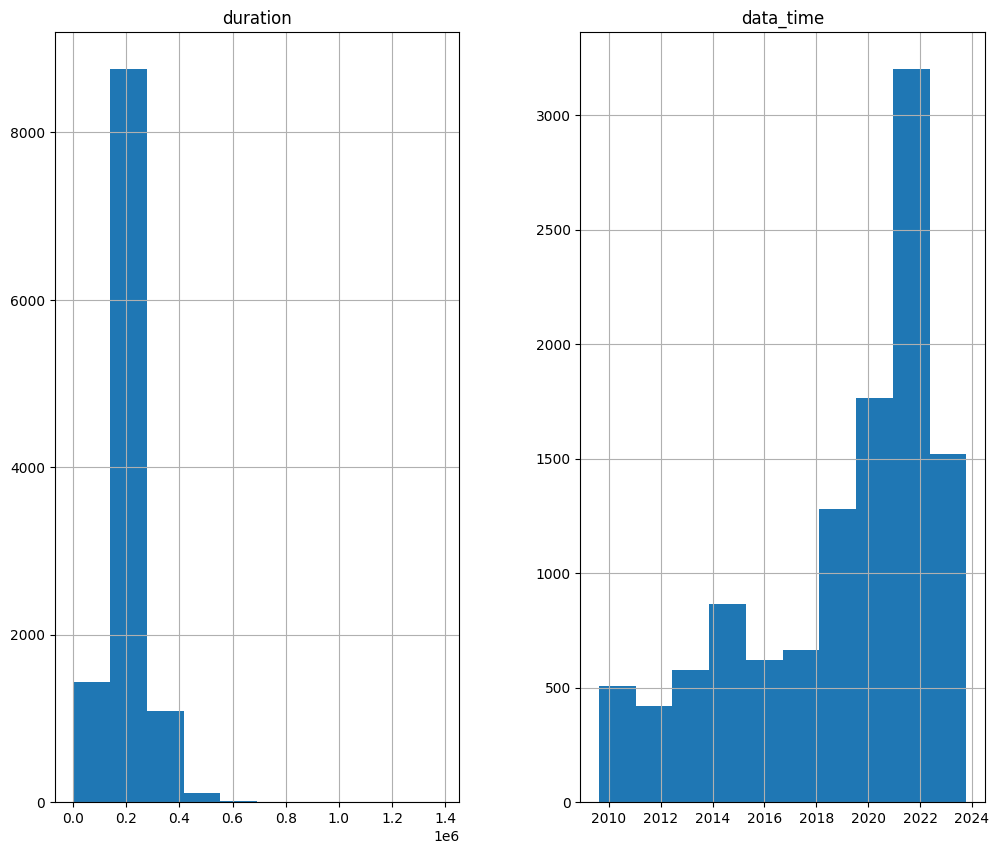

In [ ]:
#построим гистограмму для численных признаков датасета
merged.hist(figsize = (12, 10))

In [ ]:
#изучим численные признаки более детально
merged.describe()

,duration,data_time
count,1.141400e+04,11414
mean,2.050678e+05,2018-12-03 04:59:26.537585408
min,0.000000e+00,2009-08-10 17:32:06
25%,1.615300e+05,2016-06-03 12:54:53.500000
50%,1.993250e+05,2020-05-07 21:00:00
75%,2.378050e+05,2021-09-23 21:00:00
max,1.383760e+06,2023-10-17 21:00:00
std,6.671250e+04,NaN


In [ ]:
# рассмотрим распределение комбинаций жанров
merged['genres'].value_counts()

genres
POP                               2122
POP, RUSPOP                       1156
ROCK, ALLROCK                     1051
DANCE                              923
FOLK, LATINFOLK                    558
                                  ... 
CLASSICMETAL, EPICMETAL, METAL       1
POP, DANCE, ELECTRONICS, HOUSE       1
POP, JAZZ, VOCALJAZZ                 1
POP, ALLROCK, RNR                    1
ELECTRONICS, AMBIENTGENRE            1
Name: count, Length: 178, dtype: int64

In [ ]:
# рассмотрим баланс целевого признака
merged['track_remake_type'].value_counts()

track_remake_type
COVER       7872
ORIGINAL    3225
Name: count, dtype: int64

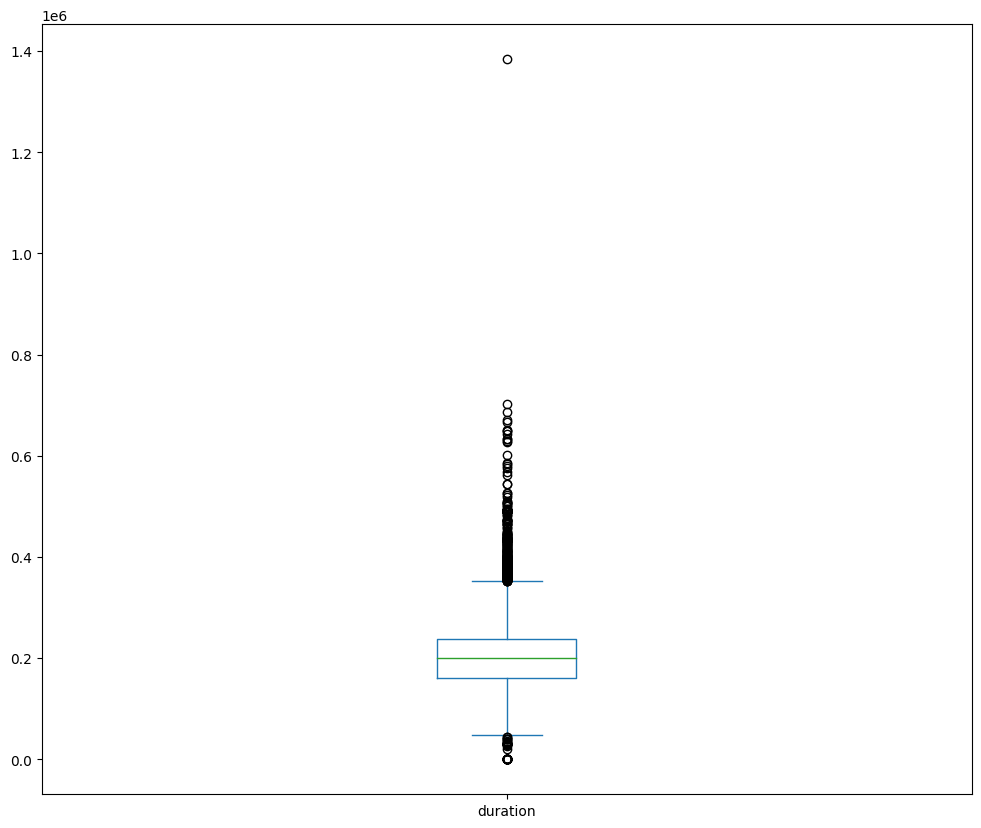

In [ ]:
# рассмотрим распределение длительности треков поподробнее
merged['duration'].plot(kind='box', figsize=(12, 10))
#plt.ylim (1, 15000000)
plt.show()

# Предобработка данных

## Обработка пропусков

In [ ]:
# прежде чем вносить изменения в данные, следует сохранить данные в новую таблицу
mer_d = merged

In [ ]:
# Выборка данных из DataFrame mer_d, где 'track_remake_type' равен 'track_id'
# и при этом в 'original_track_id' есть пропуск (пропущены ли значения 'ORIGINAL')
mer_d.loc[(mer_d['track_id'] == mer_d['original_track_id']) & (mer_d['track_remake_type'].isna())]

,original_track_id,track_id,track_remake_type,lyric_id,text,title,language,isrc,genres,duration,data_time


In [ ]:
# Выборка данных из DataFrame mer_d, где 'track_remake_type' не равен 'track_id'
# и при этом в 'original_track_id' есть пропуск (пропущены ли явные значения 'COVER')
mer_d.loc[(mer_d['track_id'] != mer_d['original_track_id']) & (mer_d['track_remake_type'].isna())]

,original_track_id,track_id,track_remake_type,lyric_id,text,title,language,isrc,genres,duration,data_time
39,NaN,d91be358c3bcbc2213a49c16dad55f38,NaN,97d7de6d5b9e7bc61617671aef50896b,"I know you so well, so well\nDarling, I can do...",Jocelyn Flores,EN,USUYG1156892,RAP,119130.0,2017-08-25 21:00:00
41,NaN,db69f2a265624a834d6e2a1238f6f225,NaN,f9b540bcf5611a87d7c474d58b4f4bc9,You were the shadow to my light\nDid you feel ...,Faded,EN,NOG841549010,"DANCE, EDMGENRE",212500.0,2016-06-02 21:00:00
71,NaN,2419bfe6d6c719cb5756ff81e91ca38e,NaN,decc32fab9334d5c0519172d07da8e9b,She's taking her time making up the reasons\nT...,To the Moon and Back,EN,USSM19700099,POP,341330.0,2014-02-03 20:00:00
119,NaN,8f259a21dc1f1c38890b82b6c93e8e50,NaN,3a6d40d2708aaf791283548f350ceb08,A scrub is a guy that think he's fine and is\n...,No Scrubs,EN,USLF20000006,"POP, RNB",215340.0,2014-03-13 20:00:00
125,NaN,d18c14b382c85fbce2251bc154e81c36,NaN,6c2620a3a60724b8c66c69b52a08a58d,Thank you\nI'll say goodbye soon\nThough it's ...,Goodbye To A World,EN,USUG11400557,ELECTRONICS,328500.0,2014-08-10 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...
10957,NaN,1e8ca836c962598551882e689265c1c5,NaN,1776ca054730a84566c3b68e490caf93,Off with your head\nDance 'til you're dead\nHe...,Heads Will Roll,EN,GBUM70900924,ALTERNATIVE,221000.0,2009-09-17 20:00:00
11003,NaN,1296f487d135fa2808e18accebb6554f,NaN,144248a3cb888ffc4f28c4b3df9f45c1,"Your body, your soul\nFeel the rhythm\nTake co...",Keep on moving,EN,FR6V80514183,ELECTRONICS,187980.0,2012-08-20 20:16:40
11126,NaN,939750791eaffaf335490c81f3e19e17,NaN,1c562e5059ec5abb0778211bfaceec83,As I walk through the valley of the shadow of ...,Gangsta's Paradise,EN,USTB10250016,RAP,240970.0,2018-10-17 21:00:00
11376,NaN,5a1fce1ebb19da07487f3132b261b78e,NaN,6a3fdd4107a56ad1d9d622246b6ba327,"Last night, all I think about is you\nDon't st...",Heat Waves,EN,GBUM72000433,INDIE,238800.0,2020-06-28 21:00:00


неслучайные пропуски

In [ ]:
mer_d.track_remake_type.fillna('COVER', inplace = True)

In [ ]:
mer_d.to_csv(r'/Users/anastasiaklubkova/Downloads/without_nan.csv',  index=False)

In [ ]:
# проверим наличие пропусков в таблице mer_d
mer_d.isna().sum()

original_track_id    7815
track_id                0
track_remake_type       0
lyric_id                0
text                    0
title                   0
language             4079
isrc                   88
genres                  0
duration                0
data_time               0
dtype: int64

Как можно заметить, в столбце 'language' (язык исполнения) присутствует значение пропусков. Попробуем определить язык текста песни (которая исполняется) и заполнить пропуски с помощью библиотеки LangDetectException

In [ ]:
# создадим пустые списки, куда бубут перемещены тексты и индексы текстов, которые библиотека не смогла распознать
unknown = []
id = []

In [ ]:
mer_d['lang'] = 0

In [ ]:
mer_d.head()

,original_track_id,track_id,track_remake_type,lyric_id,text,title,language,isrc,genres,duration,data_time,lang
0,1c4b1230f937e4c548ff732523214dcd,1c4b1230f937e4c548ff732523214dcd,ORIGINAL,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n...",Сарафан,None,AEA0D1860569,"FOREIGNBARD, BARD",140000.0,2018-09-26 02:24:21,0
1,None,0faea89b0d7d6235b5b74def72511bd8,COVER,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...,Children,None,QZS672199805,ELECTRONICS,214590.0,2021-08-04 13:08:25,0
2,9c6dc41d5ccd9968d07f055da5d8f741,9c6dc41d5ccd9968d07f055da5d8f741,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,Briane,None,USUM71006645,"ROCK, ALLROCK",317910.0,2010-05-20 05:00:14,0
3,bfd04a73e9cffdf0e282c92219a86ea1,bfd04a73e9cffdf0e282c92219a86ea1,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,Briane,None,USM951100211,"ROCK, ALLROCK",317860.0,2014-09-23 12:07:56,0
4,8d70930d09cd239c948408d1317d8659,8d70930d09cd239c948408d1317d8659,ORIGINAL,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",Broken Angel,None,USUM71006638,"ROCK, ALLROCK",321280.0,2010-05-20 05:00:14,0


In [ ]:
for i in range(len(mer_d['text'])):
    try:
        mer_d['lang'][i] = detect(mer_d['text'][i])
    except:
        unknown.append(mer_d['text'][i])
        id.append(i)
        print(i)
print(unknown)
print(id)

/var/folders/m0/wj_cjqvj2q1g_gn5y_gpxlch0000gn/T/ipykernel_44059/883331673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mer_d['lang'][i] = detect(mer_d['text'][i])


6381
7912
8423
9431
['යන්න යනව ද?\nඅර කාලේ මතක ද?\n\nඅල්ලා බන්දා රන්දා බින්දා\nඋන්දා කොන්දාලාමි සින්ද\nසැන්දැ කාලෙ මාලිගාවෙ ඉන්නවා සොයා\n\nඅල්ලා බන්දා රන්දා බින්දා\nඋන්දා කොන්දාලාමි සින්දා\nසැන්දැ කාලෙ මාලිගාවෙ ඉන්නවා සොයා\n\nසිරි සංඝබෝධි මාලිගාවෙදී මා\nදැක ප්රානෙහානි වෙන්ට බැට දෙම්\nසිරි සංඝබෝධි මාලිගාවෙදී මා\nදැක ප්රානෙහානි වෙන්ට බැට දෙම්\n\nසඳ වගේ පේනා\nඔයා මට ඕනා\nලඟින් නැති හෝරා\nගෙවනු බෑ කිසි දා\n\nසඳ වගේ පේනා\nඔයා මට ඕනා\nලඟින් නැති හෝරා\nගෙවනු බෑ කිසි දා\n\nකොටුව, කොටුව, කොටුව, පිටකොටුව 138 මම හිටිය\nඅඩිය, අඩිය, අඩිය තියන්නට බෑ එක යුද්දෙට පොර පිටිය\nතැලිලා, තැලිලා, පොඩි වෙලා තෙරපිලා කැරකිලා යන මේ රයිඩ් එක\nවිදල, විදල, පිඹලා ගියත් ඉස්කොලෙට යනකොට 8.30\n\nබැලු, බැලු හැම තැනම සිහිනෙන් වගේ\nසැඟවුණු සේයාවන් ම දෑසේ ඇඳේ\nසුළඟේ පාවී මගෙ ගී යාවි\nඇසුනොත් එනවා දෝ සොඳුරියේ මගේ\n\nලෝකයෙන් යමු\nආයෙ ඉපදෙමු\nකොතන හරි සතුටින් ඉන්න පතා\nමගේ ජීවිතේ\nලබන මතු භවේ\nආයෙමත් රවට්ටන්නට එපා\n\nලෝකයෙන් යමු\nආයෙ ඉපදෙමු\nකොතන හරි සතුටින් ඉන්න පතා\nමගේ ජීවිතේ\nලබන මතු භවේ\nආයෙමත් රවට්ටන්නට එපා\n\nඈ දුටු විට 

In [ ]:
mer_d.head()

,original_track_id,track_id,track_remake_type,lyric_id,text,title,language,isrc,genres,duration,data_time,lang
0,1c4b1230f937e4c548ff732523214dcd,1c4b1230f937e4c548ff732523214dcd,ORIGINAL,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n...",Сарафан,None,AEA0D1860569,"FOREIGNBARD, BARD",140000.0,2018-09-26 02:24:21,ru
1,None,0faea89b0d7d6235b5b74def72511bd8,COVER,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...,Children,None,QZS672199805,ELECTRONICS,214590.0,2021-08-04 13:08:25,en
2,9c6dc41d5ccd9968d07f055da5d8f741,9c6dc41d5ccd9968d07f055da5d8f741,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,Briane,None,USUM71006645,"ROCK, ALLROCK",317910.0,2010-05-20 05:00:14,en
3,bfd04a73e9cffdf0e282c92219a86ea1,bfd04a73e9cffdf0e282c92219a86ea1,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,Briane,None,USM951100211,"ROCK, ALLROCK",317860.0,2014-09-23 12:07:56,en
4,8d70930d09cd239c948408d1317d8659,8d70930d09cd239c948408d1317d8659,ORIGINAL,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",Broken Angel,None,USUM71006638,"ROCK, ALLROCK",321280.0,2010-05-20 05:00:14,en


In [ ]:
mer_d.isna().sum()

original_track_id    7815
track_id                0
track_remake_type       0
lyric_id                0
text                    0
title                   0
language             4079
isrc                   88
genres                  0
duration                0
data_time               0
lang                    0
dtype: int64

In [ ]:
mer_d['lang'].unique()

array(['ru', 'en', 'es', 'pt', 'id', 'fr', 'it', 'ja', 'pl', 'cs', 'de',
       'da', 'pa', 'sw', 'no', 'ro', 'ca', 'hi', 'tl', 'th', 'hr', 'bg',
       'et', 'bn', 'ko', 'ar', 'so', 'sv', 'vi', 'tr', 'af', 'sl', 'nl',
       'cy', 'uk', 'hu', 'el', 'he', 'ml', 0, 'ta', 'sk', 'sq', 'te',
       'zh-cn', 'fa', 'fi'], dtype=object)

Там есть 0, который обозначает вот этот нераспознанный язык. Удалим строки с ним

In [ ]:
for a in id:
    mer_d = mer_d.drop(index=[a])

In [ ]:
mer_d['lang'].unique()

array(['ru', 'en', 'es', 'pt', 'id', 'fr', 'it', 'ja', 'pl', 'cs', 'de',
       'da', 'pa', 'sw', 'no', 'ro', 'ca', 'hi', 'tl', 'th', 'hr', 'bg',
       'et', 'bn', 'ko', 'ar', 'so', 'sv', 'vi', 'tr', 'af', 'sl', 'nl',
       'cy', 'uk', 'hu', 'el', 'he', 'ml', 'ta', 'sk', 'sq', 'te',
       'zh-cn', 'fa', 'fi'], dtype=object)

In [ ]:
mer_d['lang'] = mer_d['lang'].str.upper()

In [ ]:
mer_d['lang']

0        RU
1        EN
2        EN
3        EN
4        EN
         ..
11409    EN
11410    EN
11411    EN
11412    EN
11413    RU
Name: lang, Length: 11410, dtype: object

Проверим, совпадают ли значения языка исполнения и языки текстов песен



In [ ]:
mer_d.loc[(mer_d['language'] != mer_d['lang']) & (mer_d['language'].notnull())]

,original_track_id,track_id,track_remake_type,lyric_id,text,title,language,isrc,genres,duration,data_time,lang
19,None,a1732982eb0f3980c01dc4d1178becbe,COVER,d641878195682b2338b2788769ba3f26,I found a love for me\nDarling just dive right...,Perfect,ES,QZ22B2007881,POP,99940.0,2019-04-01 17:54:32,EN
63,None,3ff929b65942590d576ceda8310c54d5,COVER,8812a490cedbb81509a2dea9dc907865,Kau takkan pernah berjalan sendiri\nBerdiri te...,Semangat Kami,EN,IDA141802109,"ROCK, ALLROCK",190280.0,2018-10-25 21:00:00,ID
64,None,b3833fc96793980030c13735f60653c4,COVER,22599fc40febac551feea7e6d18b3f34,Di sini kuberpijak menatap langit\nBerdiri teg...,Terus Bersama,EN,IDA141802119,"ROCK, ALLROCK",224540.0,2018-10-25 21:00:00,ID
65,None,1928cdf710b700448d526ccc93febc24,COVER,b7d5f94fa3cf05c7fb7b4bb9f53b0335,Sejenak tenangkan jiwaku yang penuh dilema\nTe...,Buktikan Sekali Lagi,EN,IDA141802113,"ROCK, ALLROCK",186000.0,2018-10-25 21:00:00,ID
66,None,764a3d051fdee2b2a72c2730d946b014,COVER,6679f81ef0aa7453cf43409407eb6405,Walaupun berganti hari\nSiang malam datang per...,Rasa Ini Takkan Pernah Mati,EN,IDA141802112,"ROCK, ALLROCK",254080.0,2018-10-25 21:00:00,ID
...,...,...,...,...,...,...,...,...,...,...,...,...
11336,None,40c9d38838fb8513656a22db6c13630e,COVER,766c4e38e9b49e0479bda9ec1b45ecf4,Tatoe\nArashi ga futou tomo\nTatoe oonami arer...,"Voltes V no Uta (from ""Chodenji Machine Voltes...",JA,QZGWX2208194,SOUNDTRACK,182640.0,2021-06-10 18:27:39,SW
11337,None,2e07f3305760377d28c8b182a98b71ea,COVER,b1072c2a3c39831cf1a70b873956b1a2,No se si es casualidad\nEncontrarte a ti\nA so...,"Centimeter (From ""Kanojo Okarishimasu / Rent a...",EN,QZGWX2196163,POP,226310.0,2021-06-01 20:29:06,ES
11338,None,2d9d01b06ac479098345266fa2e30bdd,COVER,7c593a8aeaf02fa419c91f67fbef2cf4,Azizim ko'k ichra hiloling bo'lib\nKelsang – y...,Azizam,UZ,NLRD52053060,POP,157500.0,2021-11-25 19:00:00,TL
11345,a47e96a3b16a06af3e25571b3781d90e,a47e96a3b16a06af3e25571b3781d90e,ORIGINAL,3326b4e4c9c9d179b03935791d5953b9,Let's don't talk about my soul\nI just really ...,Touch the Sky,EN,FR2X42072029,DANCE,170340.0,2020-04-28 21:00:00,RU


Удалим столцы с языком от заказчика, поскольку есть новый без пропусков, а также как можно увидеть по шапке датасета, нам больше полезен язык текста песни

In [ ]:
mer_d = mer_d.drop(columns = ['language'],axis = 1)

In [ ]:
mer_d = mer_d.drop(columns = ['original_track_id'],axis = 1)

In [ ]:
mer_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11410 entries, 0 to 11413
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   track_id           11410 non-null  object        
 1   track_remake_type  11410 non-null  object        
 2   lyric_id           11410 non-null  object        
 3   text               11410 non-null  object        
 4   title              11410 non-null  object        
 5   isrc               11322 non-null  object        
 6   genres             11410 non-null  object        
 7   duration           11410 non-null  float64       
 8   data_time          11410 non-null  datetime64[ns]
 9   lang               11410 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 980.5+ KB


In [ ]:
mer_d = mer_d.dropna()

In [ ]:
mer_d.isna().sum()

track_id             0
track_remake_type    0
lyric_id             0
text                 0
title                0
isrc                 0
genres               0
duration             0
data_time            0
lang                 0
dtype: int64

Теперь следует рассмотреть более-менее преобразованные данные в целом

In [ ]:
mer_d

,track_id,track_remake_type,lyric_id,text,title,isrc,genres,duration,data_time,lang
0,1c4b1230f937e4c548ff732523214dcd,ORIGINAL,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n...",Сарафан,AEA0D1860569,"FOREIGNBARD, BARD",140000.0,2018-09-26 02:24:21,RU
1,0faea89b0d7d6235b5b74def72511bd8,COVER,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...,Children,QZS672199805,ELECTRONICS,214590.0,2021-08-04 13:08:25,EN
2,9c6dc41d5ccd9968d07f055da5d8f741,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,Briane,USUM71006645,"ROCK, ALLROCK",317910.0,2010-05-20 05:00:14,EN
3,bfd04a73e9cffdf0e282c92219a86ea1,ORIGINAL,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,Briane,USM951100211,"ROCK, ALLROCK",317860.0,2014-09-23 12:07:56,EN
4,8d70930d09cd239c948408d1317d8659,ORIGINAL,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",Broken Angel,USUM71006638,"ROCK, ALLROCK",321280.0,2010-05-20 05:00:14,EN
...,...,...,...,...,...,...,...,...,...,...
11409,b734225e54122798535b40666e6e361e,COVER,90522f12df92da5d585f8f6ec9bb34b5,All my little plans and schemes\nLost like som...,Real Love,US7VG2133350,POP,276130.0,2021-03-17 10:18:44,EN
11410,b3cbb82e4ef67e75b1e47054a681db86,ORIGINAL,b82bd468c888ae17d2e976c8cf3b9d4c,I will make my way\nI'm trying to survive anot...,My Way,ITL012100021,POP,201790.0,2021-05-06 21:00:00,EN
11411,d5c149b59a800a6f9f61adda6d3e1b1d,COVER,22bae9d3185254ea34072c692a2cd63d,Left a good job in the city\nWorking for the m...,Proud Mary,UK6ZW1403686,DANCE,213660.0,2019-07-21 21:00:00,EN
11412,d5c149b59a800a6f9f61adda6d3e1b1d,COVER,0979b4049635e1c0fc161573f75ab23a,Left a good job in the city\nWorking for the m...,Proud Mary,UK6ZW1403686,DANCE,213660.0,2019-07-21 21:00:00,EN


Закодируем целевой признак

In [ ]:
mer_d['exit'] = 1
mer_d.loc[mer_d['track_remake_type'] == 'ORIGINAL', 'exit'] = 0

In [ ]:
mer_d['exit'].value_counts()

exit
1    8155
0    3167
Name: count, dtype: int64

In [ ]:
mer_d['track_remake_type'].value_counts()

track_remake_type
COVER       8155
ORIGINAL    3167
Name: count, dtype: int64

In [ ]:
mer_d = mer_d.drop('track_remake_type', axis = 1)

# Проверим аномалии в длительности треков

In [ ]:
mer_d.loc[mer_d['duration']<=0, 'duration'].count()

37

In [ ]:
mer_d = mer_d[mer_d['duration']>0]

# Проверим распределение значений в комбинации жанров

In [ ]:
mer_d['genres'].unique()

array(['FOREIGNBARD, BARD', 'ELECTRONICS', 'ROCK, ALLROCK', 'DANCE',
       'CHILDREN', 'CLASSICMETAL, METAL', 'HARDROCK, ALLROCK',
       'FILMS, SOUNDTRACK', 'POP', 'METAL, METALCOREGENRE', 'RAP',
       'RUSRAP, RAP', 'POP, RUSPOP', 'SOUL, RNB', 'INDIE',
       'DANCE, EDMGENRE', 'FOLK, LATINFOLK', 'PUNK, POSTPUNK',
       'ALTERNATIVE, POSTHARDCORE', 'ELECTRONICS, TRANCE',
       'LOCAL-INDIE, INDIE', 'EPICMETAL, METAL', 'ALTERNATIVE, INDIE',
       'DANCE, ELECTRONICS, HOUSE', 'POP, HYPERPOPGENRE', 'ALTERNATIVE',
       'JAZZ, VOCALJAZZ', 'ALLROCK, RNR', '', 'POP, RNB',
       'NEWAGE, ELECTRONICS', 'METAL, ALTERNATIVEMETAL', 'NUMETAL, METAL',
       'UKRROCK, ALLROCK', 'POP, ASIAPOP', 'FOLK, CAUCASIAN',
       'METAL, GOTHICMETAL', 'FOLK', 'ELECTRONICS, RAP',
       'ALTERNATIVE, ROCK, ALLROCK',
       'ALTERNATIVE, ROCK, FILMS, SOUNDTRACK, ALLROCK', 'METAL',
       'DANCE, ELECTRONICS', 'ELECTRONICS, LOUNGE', 'DANCE, PHONKGENRE',
       'POP, JAPANESEPOP', 'REGGAE, REGGAETON', '

In [ ]:
unique_genres = set(item for sublist in mer_d["genres"].dropna() for item in sublist)
print(f"Количество уникальных жанров: {len(unique_genres)}")

Количество уникальных жанров: 28


# Исследуем корреляцию признаков

Проверим корреляцию с целевым признаком

In [ ]:
mer_d['duration'].corr(mer_d['exit'])

0.24856769584427088

Проверим корреляцию с категориальными признаками

In [ ]:
cat = ['title', 'genres', 'lang']

In [ ]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1
    return (stat/(obs*mini))

In [ ]:
rows= []

for var1 in mer_d[cat]:
    col = []
    for var2 in mer_d[cat]:
        cramers =cramers_V(mer_d[cat][var1], mer_d[cat][var2])
        col.append(round(cramers,2))
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns =mer_d[cat].columns, index =mer_d[cat].columns)

df

,title,genres,lang
title,1.00,0.77,0.92
genres,0.77,1.00,0.11
lang,0.92,0.11,1.00


# Проверка содержания версии трека в названии трека

Проверим, есть ли в названии подсказки

In [ ]:
live_list = []
for aaa in mer_d['title']:
    if '(Live' in aaa:
        live_list.append(aaa)
    elif 'Live)' in aaa:
        live_list.append(aaa)
    elif '[Live' in aaa:
        live_list.append(aaa)
    elif 'Live]' in aaa:
        live_list.append(aaa)
    elif '- Live' in aaa:
        live_list.append(aaa)
    elif 'LIVE' in aaa:
        live_list.append(aaa)
print(live_list)

[]


In [ ]:
remix_list = []
for aaa in mer_d['title']:
    if 'remix' in aaa:
        remix_list.append(aaa)
    elif 'Remix' in aaa:
        remix_list.append(aaa)
print(remix_list)

['Too Much Of Heaven Luis Rodriguez Remix', 'Ameno Amapiano Remix (You Wanna Bamba)']


In [ ]:
version_list = []
for aaa in mer_d['title']:
    if 'version' in aaa:
        version_list.append(aaa)
    elif 'Version' in aaa:
        version_list.append(aaa)
    elif 'VERSION' in aaa:
        version_list.append(aaa)
print(version_list)

['Xo Spanish Version']


In [ ]:
remaster_list = []
for aaa in mer_d['title']:
    if 'remaster' in aaa:
        remaster_list.append(aaa)
    elif 'Remaster' in aaa:
        remaster_list.append(aaa)
    elif 'REMASTER' in aaa:
        remaster_list.append(aaa)
print(remaster_list)

[]


In [ ]:
inst_list = []
for aaa in mer_d['title']:
    if 'Instrumental' in aaa:
        inst_list.append(aaa)
    elif 'instrumental' in aaa:
        inst_list.append(aaa)
    elif 'INSTRUMENTAL' in aaa:
        inst_list.append(aaa)
print(inst_list)

[]


Вывод: нам не удалось получить новые признаки с помощью названий

# Лемматизация

## На данном этапе мы производим лемматизацию текста песен для генерации нового признака

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anastasiaklubkova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/anastasiaklubkova/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
en = mer_d.loc[mer_d['lang'] != 'RU']

In [ ]:
en.head()

,track_id,lyric_id,text,title,isrc,genres,duration,data_time,lang,exit
1,0faea89b0d7d6235b5b74def72511bd8,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...,Children,QZS672199805,ELECTRONICS,214590.0,2021-08-04 13:08:25,EN,1
2,9c6dc41d5ccd9968d07f055da5d8f741,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,Briane,USUM71006645,"ROCK, ALLROCK",317910.0,2010-05-20 05:00:14,EN,0
3,bfd04a73e9cffdf0e282c92219a86ea1,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,Briane,USM951100211,"ROCK, ALLROCK",317860.0,2014-09-23 12:07:56,EN,0
4,8d70930d09cd239c948408d1317d8659,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",Broken Angel,USUM71006638,"ROCK, ALLROCK",321280.0,2010-05-20 05:00:14,EN,0
5,b12ecdeac6ac42e1ecac96f9f15b1159,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",Broken Angel,USM951100203,"ROCK, ALLROCK",321220.0,2014-09-23 12:07:56,EN,0


In [ ]:
ru = mer_d.loc[mer_d['lang'] == 'RU']

In [ ]:
ru.head()

,track_id,lyric_id,text,title,isrc,genres,duration,data_time,lang,exit
0,1c4b1230f937e4c548ff732523214dcd,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n...",Сарафан,AEA0D1860569,"FOREIGNBARD, BARD",140000.0,2018-09-26 02:24:21,RU,0
31,77b6c9cc4fa8e707576933c461915dd9,971d8511d1d8d1f9b0fb130aa0f07116,"Знаешь, это меня не покидает\nТы именно та, не...",Голоса,RUA591801313,"RUSRAP, RAP",206400.0,2019-10-07 21:00:00,RU,0
32,f201675520b61e81c51ec2ae9bafe969,c3a8663459ebaead53ec40faa0737b17,"Пристегни ремни, нам пора взлетать\nЗнаешь, эт...",Самолёты,RUA591800991,"POP, RUSPOP",188560.0,2018-10-11 21:00:00,RU,0
35,b25df48f6f4d7ee15ae434a987e2005e,7d8aa064320d8b53e2704099e825f9a5,Eldar-Q\nЯ так тебя ждал\nТы меня опять-опять ...,Обманула,RUA1D1820660,"POP, RUSPOP",165250.0,2023-09-03 21:00:00,RU,0
40,95021f4cca449d08adc2b722cb580095,40c9579e51fd9bbb9d43d3cdb8fe6cbb,Помню как быстро закрывались двери\n(А еще пом...,Серпантин,TCADX1829554,"RUSRAP, RAP",186650.0,2022-08-10 21:00:00,RU,0


In [ ]:
def clear_text_en(text):
    clear_text = re.sub(r'[^a-zA-Z]+', ' ', text).lower()
    return " ".join(clear_text.split())


def clean_stop_words_en(text, stopwords):
    text = [word for word in text.split() if word not in stopwords]
    return " ".join(text)

In [ ]:
def clear_text_ru(text):
    clear_text = re.sub(r'[^а-яА-Я]+', ' ', text).lower()
    return " ".join(clear_text.split())


def clean_stop_words_ru(text, stopwords):
    text = [word for word in text.split() if word not in stopwords]
    return " ".join(text)

In [ ]:
stopwords_1 = set(nltk_stopwords.words('english'))
print(np.array(stopwords_1))

{'before', 'isn', 'than', 'yourself', 'haven', "you'll", 'hasn', 'shouldn', 'was', 'further', "weren't", "haven't", 'yours', 'of', 'just', "you'd", 'my', 'again', 'so', 'you', 'ourselves', 'been', 'weren', "shouldn't", 'for', 'we', "you're", "won't", 'couldn', 'mightn', "mightn't", 'as', 'has', 'who', 'above', 'how', 'will', 'our', 'they', 'there', 'mustn', 'over', 'she', "that'll", 'why', 'won', 'themselves', 'had', 's', "she's", 'that', 'hadn', 'd', 'where', 'these', 'about', 'some', 've', 'him', 't', 'which', 'have', "hadn't", 'ours', 'with', 'me', 'don', 'because', 'while', 'her', 'what', 'being', 'into', 're', 'be', "hasn't", "didn't", 'didn', 'he', 'same', 'under', 'or', 'if', 'are', 'your', 'his', 'too', 'yourselves', 'do', 'from', 'o', 'did', 'most', 'myself', 'through', "needn't", 'until', "you've", 'but', 'its', 'an', 'once', 'between', 'doesn', 'own', 'll', 'on', 'few', 'more', 'is', 'each', 'himself', 'needn', 'any', 'such', "don't", 'i', 'whom', 'now', 'wasn', 'herself', '

In [ ]:
stopwords_2 = set(nltk_stopwords.words('russian'))
print(np.array(stopwords_2))

{'меня', 'быть', 'нас', 'всех', 'вот', 'я', 'были', 'над', 'можно', 'у', 'так', 'по', 'чего', 'себе', 'же', 'он', 'его', 'тебя', 'теперь', 'раз', 'никогда', 'ее', 'со', 'их', 'только', 'будто', 'нет', 'ведь', 'том', 'с', 'совсем', 'во', 'чуть', 'ней', 'а', 'уже', 'до', 'здесь', 'зачем', 'к', 'о', 'этой', 'без', 'почти', 'про', 'как', 'будет', 'всего', 'нее', 'сам', 'него', 'этом', 'через', 'ему', 'для', 'такой', 'в', 'об', 'потом', 'между', 'вам', 'было', 'впрочем', 'всегда', 'нибудь', 'из', 'им', 'она', 'тот', 'иногда', 'этого', 'при', 'от', 'конечно', 'да', 'ни', 'наконец', 'ну', 'чтоб', 'вы', 'опять', 'не', 'мы', 'более', 'эти', 'чтобы', 'лучше', 'другой', 'может', 'то', 'надо', 'мне', 'тем', 'за', 'где', 'эту', 'если', 'тоже', 'этот', 'три', 'есть', 'еще', 'вас', 'бы', 'тогда', 'был', 'там', 'нельзя', 'или', 'ж', 'какая', 'себя', 'они', 'того', 'сейчас', 'но', 'ты', 'после', 'даже', 'ей', 'много', 'хорошо', 'них', 'ничего', 'перед', 'мой', 'разве', 'чем', 'свою', 'вдруг', 'была', '

In [ ]:
en['text_clear'] = 'aaa'

/var/folders/m0/wj_cjqvj2q1g_gn5y_gpxlch0000gn/T/ipykernel_44059/578118293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en['text_clear'] = 'aaa'


In [ ]:
ru['text_clear'] = 'aaa'

/var/folders/m0/wj_cjqvj2q1g_gn5y_gpxlch0000gn/T/ipykernel_44059/3223073604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ru['text_clear'] = 'aaa'


In [ ]:
start_clean = time()

en['text_clear'] = en['text'].apply(lambda x: clean_stop_words_en(clear_text_en(str(x)), stopwords_1))

print('Обработка текстов заняла: '+str(round(time() - start_clean, 2))+' секунд')

Обработка текстов заняла: 0.95 секунд


/var/folders/m0/wj_cjqvj2q1g_gn5y_gpxlch0000gn/T/ipykernel_44059/1607455763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en['text_clear'] = en['text'].apply(lambda x: clean_stop_words_en(clear_text_en(str(x)), stopwords_1))


In [ ]:
start_clean = time()

ru['text_clear'] = ru['text'].apply(lambda x: clean_stop_words_ru(clear_text_ru(str(x)), stopwords_2))

print('Обработка текстов заняла: '+str(round(time() - start_clean, 2))+' секунд')

Обработка текстов заняла: 0.25 секунд


/var/folders/m0/wj_cjqvj2q1g_gn5y_gpxlch0000gn/T/ipykernel_44059/2677153150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ru['text_clear'] = ru['text'].apply(lambda x: clean_stop_words_ru(clear_text_ru(str(x)), stopwords_2))


In [ ]:
en['text_clear']

1        tell fable fable tell fable tell fable tell fa...
2        ashamed fears doubts hurt make back aftermath ...
3        ashamed fears doubts hurt make back aftermath ...
4        showed best afraid best good enough know never...
5        showed best afraid best good enough know never...
                               ...                        
11408    came window sound crescendo ah came apartment ...
11409    little plans schemes lost like forgotten dream...
11410    make way trying survive another day day day da...
11411    left good job city working man ev ry night day...
11412    left good job city working man ev ry night day...
Name: text_clear, Length: 9074, dtype: object

In [ ]:
ru['text_clear']

0        живу обломами обломками той любви попытками лю...
31       знаешь это покидает именно та подделка китая к...
32       пристегни ремни нам пора взлетать знаешь это л...
35       ждал обманула ищу фонтан тобой договорились эт...
40       помню быстро закрывались двери помню звук силь...
                               ...                        
11391    беспощадна нарядна горишь огн м горишь огн м г...
11400    маяк возможно захочешь найти маяк покажет путь...
11402    хочешь узнать оу знаю выда т твой недопитый бо...
11405    ой девчонки хана ой влюбилась пацана ой девчон...
11413    ночью чь сердце любви горит вс внутри это ч м ...
Name: text_clear, Length: 2211, dtype: object

In [ ]:
nlp_en = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

/Applications/Anaconda3/anaconda3/lib/python3.9/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
def lemmatize_en(doc):
    doc = nlp_en(doc)
    return " ".join([token.lemma_ for token in doc])

In [ ]:
lemmatize_en(en['text_clear'].iloc[0])

'tell fable fable tell fable tell fable tell fable fable tell fable talk tenderly show reality fantasy bind together win one feat talk tenderly show reality fantasy bind together win one feat fable fable ah fable fable tell fable tell fable fable fable fable never end dream dream dream'

In [ ]:
%time en['lemm'] = en['text_clear'].apply(lemmatize_en)

CPU times: user 1min 10s, sys: 183 ms, total: 1min 10s
Wall time: 1min 10s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
!python3 -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 1.1 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [ ]:
nlp_ru = spacy.load('ru_core_news_sm', disable=['parser', 'ner'])

In [ ]:
def lemmatize_ru(doc):
    doc = nlp_ru(doc)
    return " ".join([token.lemma_ for token in doc])

In [ ]:
lemmatize_ru(ru['text_clear'].iloc[0])

'жить облом обломок тот любовь попытка любить нужный теряю смысл пусть невыносимый стать грусть комната потолок чужда б уплыть океан сшить б красный сарафан б забыть б лезть сеть волос пропахнуть дым вечер довольно длинный жить попытка попытка пытками найти родное ищу пью ч рный кофе утрам понять это такой б уплыть океан сшить б красный сарафан б забыть б лезть сеть б уплыть океан сшить б красный сарафан б забыть б лезть сеть волос пропахнуть дым вечер довольно длинный'

In [ ]:
%time ru['lemm'] = ru['text_clear'].apply(lemmatize_ru)

CPU times: user 1min 22s, sys: 411 ms, total: 1min 22s
Wall time: 1min 23s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
en['lemm']

1        tell fable fable tell fable tell fable tell fa...
2        ashamed fear doubt hurt make back aftermath le...
3        ashamed fear doubt hurt make back aftermath le...
4        show well afraid well good enough know never w...
5        show well afraid well good enough know never w...
                               ...                        
11408    come window sound crescendo ah come apartment ...
11409    little plan scheme lose like forget dream seem...
11410    make way try survive another day day day day w...
11411    leave good job city work man ev ry night day n...
11412    leave good job city work man ev ry night day n...
Name: lemm, Length: 9074, dtype: object

In [ ]:
ru['lemm']

0        жить облом обломок тот любовь попытка любить н...
31       знать это покидать именно тот подделка китай к...
32       пристегни ремни нам пора взлетать знать это ле...
35       ждать обмануть ищу фонтан тобой договориться э...
40       помнить быстро закрываться дверь помнить звук ...
                               ...                        
11391    беспощадный нарядный гореть огн м гореть огн м...
11400    маяк возможный захочешь найти маяк показать пу...
11402    хотеть узнать оу знать выда т твой недопитый б...
11405    ой девчонка хан ой влюбиться пацана ой девчонк...
11413    ночь чь сердце любовь гореть вс внутри это ч м...
Name: lemm, Length: 2211, dtype: object

In [ ]:
en = en.drop('text_clear', axis = 1)

In [ ]:
ru = ru.drop('text_clear', axis = 1)

In [ ]:
ru.to_csv(r'/Users/anastasiaklubkova/Downloads/ru.csv',  index=False)

In [ ]:
en.to_csv(r'/Users/anastasiaklubkova/Downloads/en.csv',  index=False)

Далее стоит обратно вернуть лемматизированные признаки в исходные данные

In [ ]:
en.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 1 to 11412
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   track_id   9074 non-null   object        
 1   lyric_id   9074 non-null   object        
 2   text       9074 non-null   object        
 3   title      9074 non-null   object        
 4   isrc       9074 non-null   object        
 5   genres     9074 non-null   object        
 6   duration   9074 non-null   float64       
 7   data_time  9074 non-null   datetime64[ns]
 8   lang       9074 non-null   object        
 9   exit       9074 non-null   int64         
 10  lemm       9074 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 850.7+ KB


In [ ]:
ru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2211 entries, 0 to 11413
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   track_id   2211 non-null   object        
 1   lyric_id   2211 non-null   object        
 2   text       2211 non-null   object        
 3   title      2211 non-null   object        
 4   isrc       2211 non-null   object        
 5   genres     2211 non-null   object        
 6   duration   2211 non-null   float64       
 7   data_time  2211 non-null   datetime64[ns]
 8   lang       2211 non-null   object        
 9   exit       2211 non-null   int64         
 10  lemm       2211 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 207.3+ KB


In [ ]:
en['track_id'].duplicated().sum()

990

In [ ]:
ru['track_id'].duplicated().sum()

118

In [ ]:
en['track_id'] = en['track_id'].drop_duplicates()

In [ ]:
ru['track_id'] = ru['track_id'].drop_duplicates()

In [ ]:
en = en.dropna()

In [ ]:
ru = ru.dropna()

In [ ]:
mer_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11285 entries, 0 to 11413
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   track_id   11285 non-null  object        
 1   lyric_id   11285 non-null  object        
 2   text       11285 non-null  object        
 3   title      11285 non-null  object        
 4   isrc       11285 non-null  object        
 5   genres     11285 non-null  object        
 6   duration   11285 non-null  float64       
 7   data_time  11285 non-null  datetime64[ns]
 8   lang       11285 non-null  object        
 9   exit       11285 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 969.8+ KB


In [ ]:
mer_d['track_id'].duplicated().sum()

1109

In [ ]:
mer_d['track_id'] = mer_d['track_id'].drop_duplicates()

In [ ]:
mer_d = mer_d.dropna()

In [ ]:
lemm = pd.merge(mer_d, ru[['track_id','lemm']], on='track_id', how='left')

In [ ]:
lemm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10176 entries, 0 to 10175
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   track_id   10176 non-null  object        
 1   lyric_id   10176 non-null  object        
 2   text       10176 non-null  object        
 3   title      10176 non-null  object        
 4   isrc       10176 non-null  object        
 5   genres     10176 non-null  object        
 6   duration   10176 non-null  float64       
 7   data_time  10176 non-null  datetime64[ns]
 8   lang       10176 non-null  object        
 9   exit       10176 non-null  int64         
 10  lemm       2093 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 874.6+ KB


In [ ]:
lemm = pd.merge(lemm, en[['track_id','lemm']], on='track_id', how='left')

In [ ]:
lemm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10176 entries, 0 to 10175
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   track_id   10176 non-null  object        
 1   lyric_id   10176 non-null  object        
 2   text       10176 non-null  object        
 3   title      10176 non-null  object        
 4   isrc       10176 non-null  object        
 5   genres     10176 non-null  object        
 6   duration   10176 non-null  float64       
 7   data_time  10176 non-null  datetime64[ns]
 8   lang       10176 non-null  object        
 9   exit       10176 non-null  int64         
 10  lemm_x     2093 non-null   object        
 11  lemm_y     8084 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 954.1+ KB


In [ ]:
lemm['lemm_x'] = lemm['lemm_x'].fillna(lemm['lemm_y'])

In [ ]:
lemm = lemm.drop('lemm_y', axis = 1)

In [ ]:
lemm = lemm.dropna()

In [ ]:
lemm.to_csv(r'/Users/anastasiaklubkova/Downloads/super_lemm.csv',  index=False)

In [ ]:
lemm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10176 entries, 0 to 10175
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   track_id   10176 non-null  object        
 1   lyric_id   10176 non-null  object        
 2   text       10176 non-null  object        
 3   title      10176 non-null  object        
 4   isrc       10176 non-null  object        
 5   genres     10176 non-null  object        
 6   duration   10176 non-null  float64       
 7   data_time  10176 non-null  datetime64[ns]
 8   lang       10176 non-null  object        
 9   exit       10176 non-null  int64         
 10  lemm_x     10176 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 874.6+ KB


In [ ]:
lemm.head()

,track_id,lyric_id,text,title,isrc,genres,duration,data_time,lang,exit,lemm_x
0,1c4b1230f937e4c548ff732523214dcd,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n...",Сарафан,AEA0D1860569,"FOREIGNBARD, BARD",140000.0,2018-09-26 02:24:21,RU,0,жить облом обломок тот любовь попытка любить н...
1,0faea89b0d7d6235b5b74def72511bd8,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...,Children,QZS672199805,ELECTRONICS,214590.0,2021-08-04 13:08:25,EN,1,tell fable fable tell fable tell fable tell fa...
2,9c6dc41d5ccd9968d07f055da5d8f741,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,Briane,USUM71006645,"ROCK, ALLROCK",317910.0,2010-05-20 05:00:14,EN,0,ashamed fear doubt hurt make back aftermath le...
3,bfd04a73e9cffdf0e282c92219a86ea1,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,Briane,USM951100211,"ROCK, ALLROCK",317860.0,2014-09-23 12:07:56,EN,0,ashamed fear doubt hurt make back aftermath le...
4,8d70930d09cd239c948408d1317d8659,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",Broken Angel,USUM71006638,"ROCK, ALLROCK",321280.0,2010-05-20 05:00:14,EN,0,show well afraid well good enough know never w...


# Поиск автора трека и года релиза путем выполнения парсинга

In [ ]:
'''
Установка MusicMetaLinke

# Клонирование репозитория MusicMetaLinker с GitHub
!git clone https://github.com/andreamust/MusicMetaLinker.git

# Смена рабочей директории на директорию проекта MusicMetaLinker
%cd MusicMetaLinker

!pip install -r requirements.txt

from MusicMetaLinker.linking import linking
from MusicMetaLinker.linking.linking import Align

Добавим колонку artist

# Функция, которая будет получать имя артиста по isrc
def get_artist_name(isrc):
    align = Align(isrc=isrc)
    artist_name = align.get_artist()
    return artist_name

# Применим функцию к каждой строке в колонке 'isrc' и создадим новую колонку 'artist'
df['artist'] = df['isrc'].apply(get_artist_name)

df['artist'].unique()

#Очень похоже, что полученные исполнители на самом деле используются как 'заглушка', не будем использовать этот столбец.

Добавим колонку release_date

# Функция, которая будет получать имя артиста по isrc

def get_release_dates(isrc):
    align = Align(isrc=isrc)
    release_date = align.get_release_date()
    return release_date

# Применим функцию к каждой строке в колонке 'isrc' и создадим новую колонку 'artist'

df['release_date'] = df['isrc'].apply(get_artist_name)

'''

"\nУстановка MusicMetaLinke\n\n# Клонирование репозитория MusicMetaLinker с GitHub\n!git clone https://github.com/andreamust/MusicMetaLinker.git\n\n# Смена рабочей директории на директорию проекта MusicMetaLinker\n%cd MusicMetaLinker\n\n!pip install -r requirements.txt\n\nfrom MusicMetaLinker.linking import linking\nfrom MusicMetaLinker.linking.linking import Align\n\nДобавим колонку artist\n\n# Функция, которая будет получать имя артиста по isrc\ndef get_artist_name(isrc):\n    align = Align(isrc=isrc)\n    artist_name = align.get_artist()\n    return artist_name\n\n# Применим функцию к каждой строке в колонке 'isrc' и создадим новую колонку 'artist'\ndf['artist'] = df['isrc'].apply(get_artist_name)\n\ndf['artist'].unique()\n\n#Очень похоже, что полученные исполнители на самом деле используются как 'заглушка', не будем использовать этот столбец.\n\nДобавим колонку release_date\n\n# Функция, которая будет получать имя артиста по isrc\n\ndef get_release_dates(isrc):\n    align = Align(i

Результат выполнения ячнйки выше:

In [ ]:
nat_data = pd.read_csv('/Users/anastasiaklubkova/Downloads/date_full (1).csv')

In [ ]:
nat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  11000 non-null  int64  
 1   Unnamed: 0    11000 non-null  int64  
 2   track_id      11000 non-null  object 
 3   lyric_id      11000 non-null  object 
 4   text          11000 non-null  object 
 5   title         11000 non-null  object 
 6   isrc          11000 non-null  object 
 7   genres        10942 non-null  object 
 8   duration      11000 non-null  float64
 9   lang          11000 non-null  object 
 10  data_time     11000 non-null  object 
 11  exit          11000 non-null  int64  
 12  release_date  9840 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 1.1+ MB


In [ ]:
nat_data['track_id'].duplicated().sum()

1090

In [ ]:
nat_data['track_id'] = nat_data['track_id'].drop_duplicates()

In [ ]:
nat_data = nat_data.dropna()

In [ ]:
lemm = pd.merge(lemm, nat_data[['track_id','release_date']], on='track_id', how='left')

In [ ]:
lemm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10176 entries, 0 to 10175
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   track_id      10176 non-null  object        
 1   lyric_id      10176 non-null  object        
 2   text          10176 non-null  object        
 3   title         10176 non-null  object        
 4   isrc          10176 non-null  object        
 5   genres        10176 non-null  object        
 6   duration      10176 non-null  float64       
 7   data_time     10176 non-null  datetime64[ns]
 8   lang          10176 non-null  object        
 9   exit          10176 non-null  int64         
 10  lemm_x        10176 non-null  object        
 11  release_date  8847 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 954.1+ KB


In [ ]:
lemm = lemm.dropna()

In [ ]:
lemm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8847 entries, 0 to 9909
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   track_id      8847 non-null   object        
 1   lyric_id      8847 non-null   object        
 2   text          8847 non-null   object        
 3   title         8847 non-null   object        
 4   isrc          8847 non-null   object        
 5   genres        8847 non-null   object        
 6   duration      8847 non-null   float64       
 7   data_time     8847 non-null   datetime64[ns]
 8   lang          8847 non-null   object        
 9   exit          8847 non-null   int64         
 10  lemm_x        8847 non-null   object        
 11  release_date  8847 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 898.5+ KB


In [ ]:
new_data = lemm

Таким образом мы собрали новые признаки и готовы обучать модели

In [ ]:
data_copy = new_data
data_copy.shape == new_data.shape

True

In [ ]:
data_train, data_test = train_test_split(data_copy, test_size=0.25, random_state=12345)

In [ ]:
from sklearn.utils import shuffle

Удалим нерелевантные задаче классификации признаки

In [ ]:
features_train = data_train.drop(columns = ['exit', 'track_id', 'lyric_id', 'text', 'title', 'isrc', 'lang', 'data_time'])
target_train = data_train['exit']

features_test = data_test.drop(columns = ['exit', 'track_id', 'lyric_id', 'text', 'title', 'isrc', 'lang', 'data_time'])
target_test = data_test['exit']

In [ ]:
features_categirical = ['genres']
labelencoder = LabelEncoder()

labelencoder.fit(features_train[features_categirical])
features_train[
    'genres'
] = labelencoder.transform(features_train[features_categirical])


features_train.head()

/Applications/Anaconda3/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/Anaconda3/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,genres,duration,lemm_x,release_date
3170,85,256780.0,time use look father eye happy home king golde...,2014.0
52,128,239760.0,oh morning come burst cloud amen lift blindfol...,2011.0
1773,123,133720.0,bone juice man yuh uh huh yeah uhh yeah let ge...,2020.0
2025,85,206860.0,think hurt one ever leave quite sore word cut ...,2015.0
7343,49,219270.0,света бродить позабыв вс уходить подобно ветер...,2022.0


In [ ]:
labelencoder.fit(features_test[features_categirical])
features_test[
    'genres'
] = labelencoder.transform(features_test[features_categirical])


features_test.head()

/Applications/Anaconda3/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/Anaconda3/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,genres,duration,lemm_x,release_date
1871,83,151720.0,хотеть обнять уйти понять тот слово ч м вино л...,2019.0
5300,94,207020.0,partiste el coraz n ay mi coraz n pero mi amor...,2019.0
3691,15,109040.0,thinkin bout ooh ooh ooh ooh thinkin bout ooh ...,2021.0
7150,51,183320.0,boy girl wanna hear true story saturday night ...,2013.0
2676,70,211690.0,want nothing hear knock door cause could see f...,2021.0


In [ ]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6635 entries, 3170 to 4670
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        6635 non-null   int64  
 1   duration      6635 non-null   float64
 2   lemm_x        6635 non-null   object 
 3   release_date  6635 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 259.2+ KB


In [ ]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 1871 to 256
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        2212 non-null   int64  
 1   duration      2212 non-null   float64
 2   lemm_x        2212 non-null   object 
 3   release_date  2212 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 86.4+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

TfidfV_train = vectorizer.fit_transform(features_train['lemm_x'])
TfidfV_test = vectorizer.transform(features_test['lemm_x'])

In [ ]:
num = ['genres', 'duration', 'release_date']

In [ ]:
num_data_train = features_train[num]

In [ ]:
text_data_train = TfidfV_train

In [ ]:
num_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6635 entries, 3170 to 4670
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        6635 non-null   int64  
 1   duration      6635 non-null   float64
 2   release_date  6635 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 207.3 KB


In [ ]:
num_data_test = features_train[num]

In [ ]:
text_data_test = TfidfV_test

In [ ]:
scaler = StandardScaler()
scaler.fit(num_data_train)
num_data_train = scaler.transform(num_data_train)
num_data_test = scaler.transform(num_data_test)

# Тестируем обучение на численных признаках

Далее мы решили разделить способы обучения для численных и текстовых признаков в целях исследования различий показателей качества предсказания является ли трек оригиналом или кавером

In [ ]:
classifiers_1 = [DecisionTreeClassifier(random_state=SEED),
               RandomForestClassifier(random_state=SEED),
               LogisticRegression(random_state=SEED),
               CatBoostClassifier(random_state=SEED, verbose=False)]

In [ ]:
head = 10
for model in classifiers_1[:head]:
    start = time()
    model.fit(num_data_train, target_train)
    train_time = time() - start
    start = time()
    pred_train = model.predict(num_data_train)
    scores = cross_val_score(estimator = model, X=num_data_train, y=target_train, scoring='f1')
    final_score = sum(scores) / len(scores)
    predict_time = time()-start
    print(model)
    print("\tВремя обучения: %0.3fs" % train_time)
    print("\tВремя предсказания+оценка: %0.3fs" % predict_time)
    print('Средняя оценка качества модели:', final_score)
    print()

DecisionTreeClassifier(random_state=12345)
	Время обучения: 0.025s
	Время предсказания+оценка: 0.080s
Средняя оценка качества модели: 0.8813562430710921

RandomForestClassifier(random_state=12345)
	Время обучения: 0.454s
	Время предсказания+оценка: 1.925s
Средняя оценка качества модели: 0.9018176325514655

LogisticRegression(random_state=12345)
	Время обучения: 0.040s
	Время предсказания+оценка: 0.025s
Средняя оценка качества модели: 0.8587770543470628

	Время обучения: 2.272s
	Время предсказания+оценка: 9.299s
Средняя оценка качества модели: 0.9196228500528638



# Тестируем на текстовых признаках

In [ ]:
classifiers_2 = [DecisionTreeClassifier(random_state=SEED),
               RandomForestClassifier(random_state=SEED)]

In [ ]:
head = 10
for model in classifiers_2[:head]:
    start = time()
    model.fit(text_data_train, target_train)
    train_time = time() - start
    start = time()
    pred_train = model.predict(text_data_train)
    scores = cross_val_score(estimator = model, X=text_data_train, y=target_train, scoring='f1')
    final_score = sum(scores) / len(scores)
    predict_time = time()-start
    print(model)
    print("\tВремя обучения: %0.3fs" % train_time)
    print("\tВремя предсказания+оценка: %0.3fs" % predict_time)
    print('Средняя оценка качества модели:', final_score)
    print()

DecisionTreeClassifier(random_state=12345)
	Время обучения: 3.649s
	Время предсказания+оценка: 15.425s
Средняя оценка качества модели: 0.8793661865012012

RandomForestClassifier(random_state=12345)
	Время обучения: 5.632s
	Время предсказания+оценка: 47.143s
Средняя оценка качества модели: 0.9135603463784898



# Решение задачи группировки оригинала трека и каверов

**Векторизация текстов:** Для анализа текстов мф использовали библиотеку gensim и модель Doc2Vec. Это позволило нам преобразовать тексты в числовые векторы, которые можно использовать для вычисления сходства между текстами.  
**Расчет сходства:** Моя модель Doc2Vec позволила нам вычислить степень сходства между текстами песен на основе косинусной близости. Это помогло нам определить, насколько тексты песен похожи друг на друга.  
**Идентификация оригинальных и кавер-версий:** Мы определили индексы оригинальных и кавер-версий песен в нашем датафрейме на основе информации о типе песни.  
**Создание новых столбцов для результатов:** Для хранения результатов мы создали новые столбцы в нашем датафрейме, такие как похожие оригинальные песни, похожие кавер-версии и оценки сходства.  
**Выявление похожих песен:** МЫ определили, какие песни оказались похожими на другие, на основе расчета сходства между текстами.  
**Что мы получили:** Мы получили  датафрейм, который содержит информацию о сходстве между парами песен. Для каждой песни мы знаем, какие другие песни в моей базе данных похожи на нее. Также, мы знаем степень сходства между этими парами песен.  
**Как мы можем использовать это дальше:**
Рекомендации для пользователей: мы можем использовать эти данные для рекомендации пользователям похожих песен на основе их предпочтений.  
**Анализ трендов:** Мы можем исследовать, какие песни чаще всего имеют кавер-версии, и какие песни чаще всего используются как основа для каверов.

**Описание:**  
**similar_originals (Похожие оригинальные песни):** Этот столбец позволяет мне узнать, какие другие оригинальные песни в моей коллекции похожи на данную оригинальную песню. Это может быть полезно, если я хочу найти и предложить слушателям песни с схожим стилем или темой.

**similar_covers  (Похожие кавер-версии):** Этот столбец позволяет мне узнать, какие кавер-версии похожи на данную кавер-версию песни.
Это может быть полезно, если я хочу найти и предложить слушателям песни с схожим стилем или темой.

**similarity_scores (Оценки сходства):** Этот столбец содержит числовые оценки, которые отражают степень сходства между парами песен. Я могу использовать эти оценки, чтобы узнать, какие песни схожи больше всего. Например, я могу предоставить  слушателям песни с самой высокой оценкой сходства, чтобы помочь им найти интересный им контент.

In [ ]:
'''
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

# Преобразование текстов в формат, пригодный для обработки Doc2Vec
documents = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(clear_data['text'])]

# Создание модели Doc2Vec
model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=4)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=10)

# Векторизация текстов
text_vectors = [model.infer_vector(doc.split()) for doc in clear_data['text']]

# Вычисление матрицы сходства между текстами
similarity_matrix = cosine_similarity(text_vectors, text_vectors)

# Исключаем диагональные элементы, так как они представляют собой сравнение текста с самим собой
np.fill_diagonal(similarity_matrix, 0)

# Определение индексов оригинальных текстов
original_indices = [i for i, track_remake_type in enumerate(clear_data['track_remake_type']) if track_remake_type == 'ORIGINAL']

cover_indices = [i for i, track_remake_type in enumerate(clear_data['track_remake_type']) if track_remake_type == 'COVER']

# Создайте пустые столбцы в датафрейме для хранения результатов
clear_data['similar_originals'] = None
clear_data['similar_covers'] = None
clear_data['similarity_scores'] = None

# Найдем для каждого оригинала каверы и их похожие песни
for original_index in original_indices:
    original_title = clear_data.at[original_index, 'title']
    similarities = similarity_matrix[original_index]
    similar_text_indices = [i for i, similarity in enumerate(similarities) if similarity > 0.5]
    similar_text_indices = [i for i in similar_text_indices if i != original_index]

    if similar_text_indices:
        similar_titles = [clear_data.at[i, 'title'] for i in similar_text_indices]
        similarity_scores = [similarities[i] for i in similar_text_indices]
        is_cover = [clear_data.at[i, 'track_remake_type'] == 'COVER' for i in similar_text_indices]
        similar_originals = [title for title, is_cover in zip(similar_titles, is_cover) if not is_cover]
        similar_covers = [title for title, is_cover in zip(similar_titles, is_cover) if is_cover]

        clear_data.at[original_index, 'similar_originals'] = ", ".join(similar_originals)
        clear_data.at[original_index, 'similar_covers'] = ", ".join(similar_covers)
        clear_data.at[original_index, 'similarity_scores'] = ", ".join(map(str, similarity_scores))

# Найдем для каждого кавера оригиналы и другие каверы
for cover_index in cover_indices:
    cover_title = clear_data.at[cover_index, 'title']
    similarities = similarity_matrix[cover_index]
    similar_text_indices = [i for i, similarity in enumerate(similarities) if similarity > 0.5]
    similar_text_indices = [i for i in similar_text_indices if i != cover_index]

    if similar_text_indices:
        similar_titles = [clear_data.at[i, 'title'] for i in similar_text_indices]
        similarity_scores = [similarities[i] for i in similar_text_indices]
        is_cover = [clear_data.at[i, 'track_remake_type'] == 'COVER' for i in similar_text_indices]
        similar_originals = [title for title, is_cover in zip(similar_titles, is_cover) if not is_cover]
        similar_covers = [title for title, is_cover in zip(similar_titles, is_cover) if is_cover]

        clear_data.at[cover_index, 'similar_originals'] = ", ".join(similar_originals)
        clear_data.at[cover_index, 'similar_covers'] = ", ".join(similar_covers)
        clear_data.at[cover_index, 'similarity_scores'] = ", ".join(map(str, similarity_scores))
'''

In [ ]:
import pandas as pd
aleks_data = pd.read_csv('/clear_data_3.csv')

In [ ]:
aleks_data.head()